In [1]:
import pandas as pd
import cupy as cp

In [2]:
# Read CSV into pandas first
df = pd.read_csv('DNN-EdgeIIoT-dataset.csv')


/tmp/ipykernel_3216083/1696528042.py:2: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DNN-EdgeIIoT-dataset.csv')


<Axes: xlabel='Attack_label'>

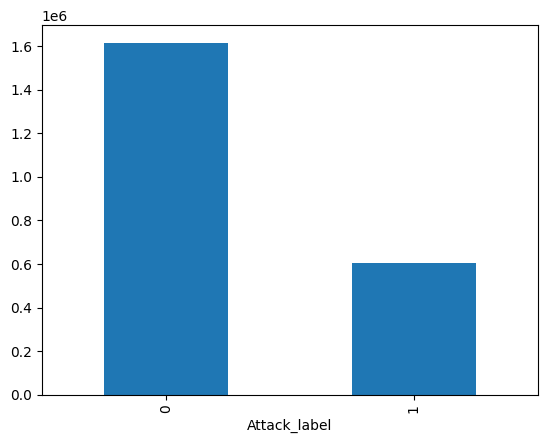

In [9]:
import matplotlib.pyplot as plt
df["Attack_label"].value_counts().plot(kind='bar')

In [10]:
df["Attack_label"].value_counts()

Attack_label
0    1615643
1     603558
Name: count, dtype: int64

<Axes: xlabel='Attack_type'>

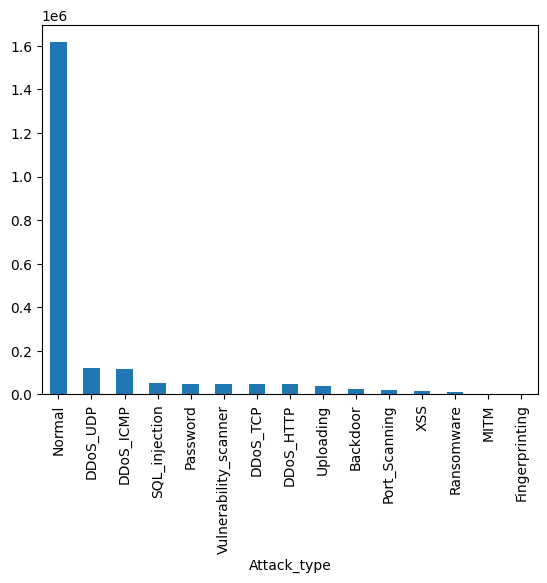

In [11]:
df["Attack_type"].value_counts().plot(kind='bar')

In [12]:
df["Attack_type"].value_counts()

Attack_type
Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: count, dtype: int64

In [14]:
# Drop duplicates and save the result back to df
df = df.drop_duplicates()


In [ ]:
from joblib import Parallel, delayed  # Multi-threading
import os
import pandas as pd

df = pd.read_csv('DNN-EdgeIIoT-dataset.csv')
df.drop_duplicates(inplace=True)
# Function to extract data for each attack type
def extract_attack_data(attack, df):
    return df.query(f"Attack_type == '{attack}'").iloc[:5000]

# Extract 10000 rows for Normal (single-threaded since it's a small subset)
normal_data = df.query("Attack_type == 'Normal'").iloc[:10000]

# Get unique attack types excluding Normal
attack_types = df['Attack_type'].unique()
attack_types = attack_types[attack_types != 'Normal']

# Parallel extraction of attack data using all CPU cores
attack_data_list = Parallel(n_jobs=-1)(delayed(extract_attack_data)(attack, df) for attack in attack_types)

# Combine all extracted data
df_extracted_85_15 = pd.concat([normal_data] + attack_data_list, ignore_index=True)

# Save to CSV
df_extracted_85_15.to_csv('dataset_extracted_85_15.csv', index=False)

# Print dataset information
print(f"Total rows in extracted dataset: {len(df_extracted_80_20)}")
print("\nRows per attack type:")
print(df_extracted_85_15['Attack_type'].value_counts())


/tmp/ipykernel_3471234/795797686.py:5: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DNN-EdgeIIoT-dataset.csv')


Total rows in extracted dataset: 71401

Rows per attack type:
Attack_type
Normal                   10000
Uploading                 5000
Ransomware                5000
DDoS_HTTP                 5000
SQL_injection             5000
DDoS_TCP                  5000
Password                  5000
XSS                       5000
Port_Scanning             5000
Vulnerability_scanner     5000
Backdoor                  5000
DDoS_ICMP                 5000
DDoS_UDP                  5000
Fingerprinting            1001
MITM                       400
Name: count, dtype: int64
